In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("placedata.csv")
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [4]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [5]:
df.shape

(10000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [7]:
df.isna().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [8]:
# Encode categorical variables
le=LabelEncoder()
cols=["ExtracurricularActivities","PlacementTraining","PlacementStatus"]
for i in cols:
    df[i]=le.fit_transform(df[i])
df.head().T

,0,1,2,3,4
StudentID,1.0,2.0,3.0,4.0,5.0
CGPA,7.5,8.9,7.3,7.5,8.3
Internships,1.0,0.0,1.0,1.0,1.0
Projects,1.0,3.0,2.0,1.0,2.0
Workshops/Certifications,1.0,2.0,2.0,2.0,2.0
AptitudeTestScore,65.0,90.0,82.0,85.0,86.0
SoftSkillsRating,4.4,4.0,4.8,4.4,4.5
ExtracurricularActivities,0.0,1.0,1.0,1.0,1.0
PlacementTraining,0.0,1.0,0.0,1.0,1.0
SSC_Marks,61.0,78.0,79.0,81.0,74.0


In [9]:
df.corr()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
StudentID,1.000000,0.005724,0.015655,0.015924,0.011872,0.020314,-0.002269,0.013683,0.026297,-0.003082,0.024115,0.004294
CGPA,0.005724,1.000000,0.280601,0.435928,0.349686,0.461250,0.383547,0.444130,0.251628,0.404971,0.462313,0.423131
Internships,0.015655,0.280601,1.000000,0.309196,0.279110,0.320725,0.273691,0.274960,0.153547,0.279837,0.317149,0.260340
Projects,0.015924,0.435928,0.309196,1.000000,0.377865,0.540339,0.450294,0.491430,0.293709,0.499421,0.535708,0.475186
Workshops/Certifications,0.011872,0.349686,0.279110,0.377865,1.000000,0.388061,0.342397,0.373926,0.180333,0.373045,0.418442,0.362268
AptitudeTestScore,0.020314,0.461250,0.320725,0.540339,0.388061,1.000000,0.515400,0.474130,0.314772,0.513044,0.565105,0.521744
SoftSkillsRating,-0.002269,0.383547,0.273691,0.450294,0.342397,0.515400,1.000000,0.448049,0.235571,0.430734,0.466912,0.427284
ExtracurricularActivities,0.013683,0.444130,0.274960,0.491430,0.373926,0.474130,0.448049,1.000000,0.327158,0.517850,0.533572,0.482491
PlacementTraining,0.026297,0.251628,0.153547,0.293709,0.180333,0.314772,0.235571,0.327158,1.000000,0.257440,0.325434,0.323659
SSC_Marks,-0.003082,0.404971,0.279837,0.499421,0.373045,0.513044,0.430734,0.517850,0.257440,1.000000,0.524916,0.469763


In [10]:
# Features and target
x=df[["AptitudeTestScore","HSC_Marks"]]
y=df[["PlacementStatus"]]
x

,AptitudeTestScore,HSC_Marks
0,65,79
1,90,82
2,82,80
3,85,80
4,86,88
...,...,...
9995,72,66
9996,90,67
9997,70,81
9998,87,85


In [11]:
# Split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
x_test

,AptitudeTestScore,HSC_Marks
5876,81,61
6555,89,72
1448,78,78
3351,84,84
231,87,84
...,...,...
869,88,85
2928,85,87
8436,84,62
6312,68,64


In [12]:
#LINEAR REGRESSION
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.coef_
lr.intercept_
ypred=lr.predict(x_test)
ypred
r2_score(y_test,ypred)

0.3635067013174975

In [21]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(x_train,y_train)
ypred=knn.predict(x_test)
ypred
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

0.731
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1176
           1       0.68      0.67      0.67       824

    accuracy                           0.73      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.73      0.73      0.73      2000



In [33]:
#LINEAR SVC
classifier=LinearSVC()
classifier.fit(x_train,y_train)
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(x_test)
print('Test Accuracy=',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,y_pred))

Test Accuracy= 0.7855
[[973 203]
 [225 599]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1176
           1       0.74      0.75      0.74       824

    accuracy                           0.79      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.79      0.79      0.79      2000



In [24]:
# LOGISTIC REGRESSION
model = LogisticRegression()
model.fit(x_train, y_train)
ylr_pred = model.predict(x_test)
print("✅ Accuracy:", accuracy_score(y_test, ylr_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, ylr_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, ylr_pred))

✅ Accuracy: 0.786

📊 Confusion Matrix:
 [[973 203]
 [225 599]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1176
           1       0.75      0.73      0.74       824

    accuracy                           0.79      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.79      0.79      0.79      2000



In [34]:
#RandomForestClassifier
classify= RandomForestClassifier(n_estimators= 100, criterion="entropy")
classify.fit(x_train, y_train)
ypred=classify.predict(x_test)
a=accuracy_score(ypred,y_test)
print(a)

0.762


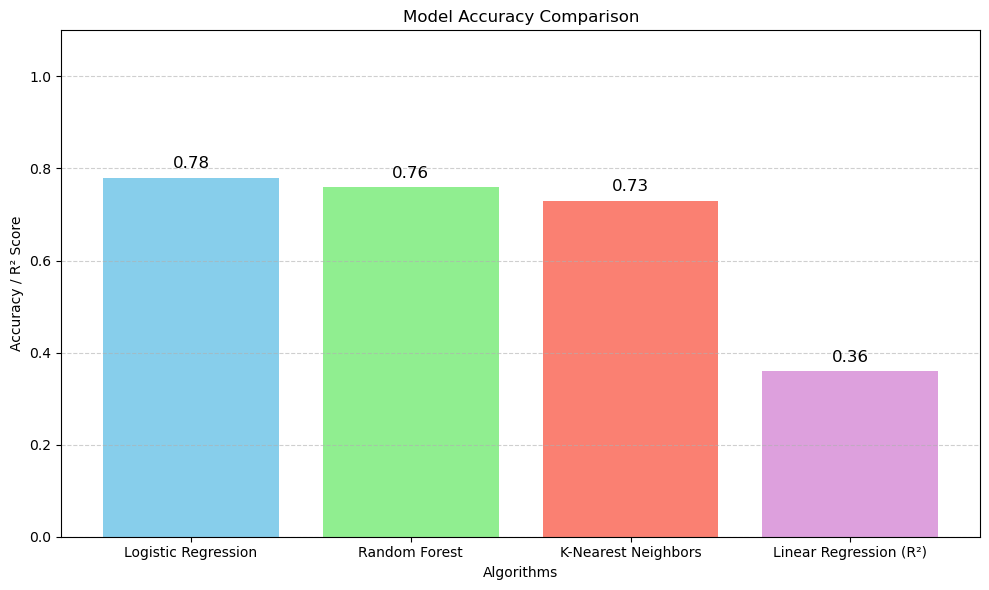

In [26]:
# Visualization
accuracies = {
    'Logistic Regression': 0.78, 
    'Random Forest': 0.76,
    'K-Nearest Neighbors': 0.73,
    'Linear Regression (R²)': 0.36
}
models = list(accuracies.keys())
scores = list(accuracies.values())
plt.figure(figsize=(10, 6))
bars = plt.bar(models, scores, color=['skyblue', 'lightgreen', 'salmon', 'plum'])
plt.ylim(0, 1.1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy / R² Score')
plt.xlabel('Algorithms')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()